In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,ambience creacions,6.00,sector 22,2053.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,NaN,NaN,NaN,3000.0,0,1,0,1,0,2,49,7305.25
1,m3m woodshire,1.00,sector 107,750.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,NaN,1534.0,NaN,1056.0,1,0,0,0,0,1,29,6670.00
2,satya the legend,9.25,sector 57,16577.0,5580.0,Plot area 642(536.79 sq.m.)Built Up area: 630 ...,5,5,3+,4.0,North-East,Relatively New,house,NaN,630.0,620.0,1,1,1,1,0,2,160,1116.00
3,vatika gurgaon,0.07,sector 83,627.0,1117.0,Super Built up area 1245(115.66 sq.m.)Built Up...,2,2,2,3.0,South-East,Relatively New,NaN,1245.0,850.0,790.0,1,0,0,1,0,2,165,558.50
4,dlf the arbour,8.50,sector 63,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,house,NaN,3950.0,NaN,0,0,0,0,0,1,61,987.50


In [7]:
df.isnull().sum()

society                   1
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  994
agePossession             0
property_type          2808
super_built_up_area    1631
built_up_area          1969
carpet_area            1669
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [8]:
df['property_type'].fillna('flat',inplace=True)

In [9]:
df.isnull().sum()

society                   1
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  994
agePossession             0
property_type             0
super_built_up_area    1631
built_up_area          1969
carpet_area            1669
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

#### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

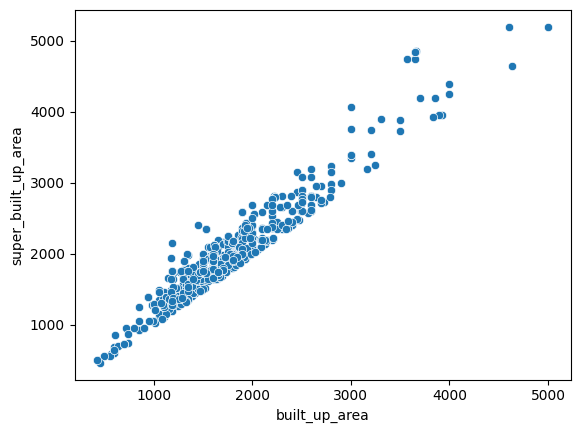

In [10]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

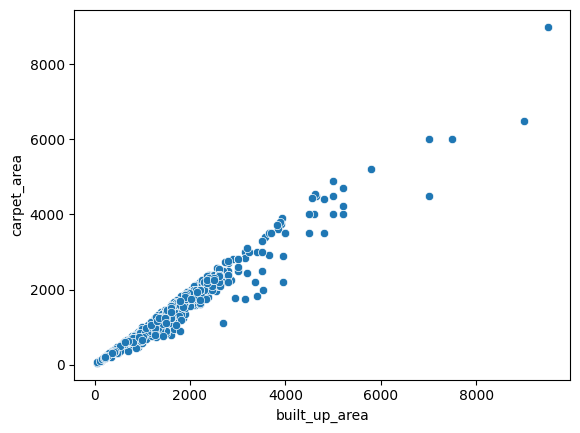

In [11]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [12]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))


0       False
1       False
2       False
3       False
4       False
        ...  
3500    False
3501    False
3502    False
3503    False
3504    False
Length: 3505, dtype: bool

In [13]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [14]:
all_present_df.shape

(531, 24)

In [15]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [16]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [17]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [18]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [19]:
sbc_df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,m3m woodshire,1.00,sector 107,750.0,13340.0,Super Built up area 1534(142.51 sq.m.)Carpet a...,2,2,3,0.0,North-East,Relatively New,flat,1534.0,NaN,1056.0,1,0,0,0,0,1,29,6670.0
16,mapsko paradise,0.07,sector 83,560.0,1251.0,Super Built up area 1340(124.49 sq.m.)Carpet a...,3,3,3,10.0,North,New Property,flat,1340.0,NaN,1000.0,0,0,0,0,1,2,49,417.0
41,viridian the plaza 106,0.03,sector 106,557.0,539.0,Super Built up area 700(65.03 sq.m.)Carpet are...,1,1,1,7.0,East,Relatively New,flat,700.0,NaN,450.0,0,0,0,0,0,1,130,539.0
44,bptp terra,1.00,sector 37d,950.0,10530.0,Super Built up area 1811(168.25 sq.m.)Carpet a...,3,3,3,9.0,South,Relatively New,flat,1811.0,NaN,996.3,1,0,0,0,0,2,24,3510.0
58,signature global the millennia,0.06,sector 37d,1091.0,550.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2,2,3,0.0,NaN,New Property,flat,650.0,NaN,596.0,0,0,0,0,0,1,40,275.0


In [20]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_5898/1215074969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [21]:
df.update(sbc_df)

In [22]:
df.isnull().sum()

society                   1
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  994
agePossession             0
property_type             0
super_built_up_area    1631
built_up_area          1548
carpet_area            1669
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [23]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [24]:
sb_df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
8,microtek greenburg,1.00,sector 86,845.0,11840.0,Super Built up area 2285(212.28 sq.m.),3,4,3,12.0,East,Relatively New,flat,2285.0,NaN,NaN,0,1,0,0,0,1,72,3946.666667
12,pareena coban residences,1.00,sector 99a,616.0,16236.0,Super Built up area 1997(185.53 sq.m.),3,5,3,5.0,North-East,Relatively New,flat,1997.0,NaN,NaN,0,1,0,0,0,1,99,5412.000000
14,raheja vedaanta,0.08,sector 108,408.0,1961.0,Super Built up area 1838(170.76 sq.m.),3,3,3,9.0,North-East,Relatively New,flat,1838.0,NaN,NaN,0,0,0,1,0,1,174,653.666667
20,shree vardhman flora,0.07,sector 90,461.0,1517.0,Super Built up area 1352(125.6 sq.m.),2,2,3,9.0,North-East,New Property,flat,1352.0,NaN,NaN,1,0,0,0,1,1,51,758.500000
24,tulip violet,1.00,sector 69,889.0,11251.0,Super Built up area 1350(125.42 sq.m.),2,3,1,0.0,North-West,Relatively New,flat,1350.0,NaN,NaN,0,0,0,0,0,1,150,5625.500000


In [25]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_5898/1215299602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105), inplace=True)


In [26]:
df.update(sb_df)

In [27]:
df.isnull().sum()

society                   1
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  994
agePossession             0
property_type             0
super_built_up_area    1631
built_up_area           674
carpet_area            1669
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [28]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [29]:
c_df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,ambience creacions,6.00,sector 22,2053.0,29221.0,Carpet area: 3000 (278.71 sq.m.),4,5,3+,10.0,South-East,New Property,flat,NaN,NaN,3000.0,0,1,0,1,0,2,49,7305.25
5,m3m golfestate,1.00,sector 79,1000.0,10000.0,Carpet area: 1400 (130.06 sq.m.),2,2,2,4.0,East,Undefined,flat,NaN,NaN,1400.0,1,1,1,0,0,0,83,5000.00
6,bajrang apartments,0.03,sector 6,447.0,671.0,Carpet area: 850 (78.97 sq.m.),2,2,2,1.0,NaN,Moderately Old,flat,NaN,NaN,850.0,0,0,0,0,0,1,0,335.50
10,signature global park,0.05,sohna road,669.0,747.0,Carpet area: 822 (76.37 sq.m.),2,2,3,3.0,East,Undefined,flat,NaN,NaN,822.0,0,0,0,0,0,1,58,373.50
17,unitech escape,12.00,sector 50,37037.0,3240.0,Carpet area: 360 (301.01 sq.m.),5,6,3+,3.0,East,Undefined,house,NaN,NaN,360.0,0,0,0,0,0,1,66,648.00


In [30]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)

/var/folders/rb/0njqjp6d1fb2sbqjjl26fh7h0000gn/T/ipykernel_5898/3473321853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9), inplace=True)


In [31]:
df.update(c_df)

In [32]:
df.isnull().sum()

society                   1
price                     0
sector                    0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  994
agePossession             0
property_type             0
super_built_up_area    1631
built_up_area             0
carpet_area            1669
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

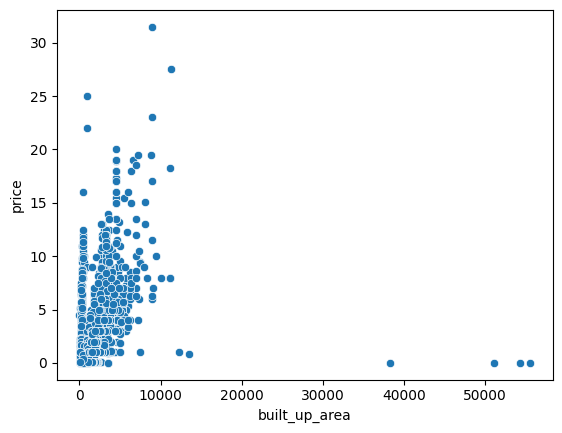

In [33]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [34]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [35]:
anamoly_df.sample(5)

,price,area,built_up_area
2847,22.00,8250.0,1000.0
228,9.50,4071.0,500.0
1220,4.50,3240.0,360.0
637,3.75,1440.0,160.0
2842,5.70,2430.0,270.0


In [36]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [37]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

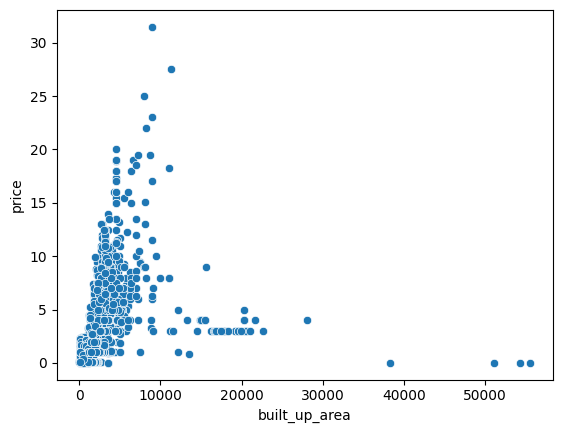

In [39]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [41]:
df.drop(columns=['area','areaWithType','super_built_up_area', 'carpet_area','area_room_ratio'], inplace=True)

In [42]:
df.head()

,society,price,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,2053.0,4,5,3+,10.0,South-East,New Property,flat,3333.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,750.0,2,2,3,0.0,North-East,Relatively New,flat,1281.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5,5,3+,4.0,North-East,Relatively New,house,5580.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,627.0,2,2,2,3.0,South-East,Relatively New,flat,850.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,4,4,3+,27.0,NaN,Undefined,house,3950.0,0,0,0,0,0,1,61


In [43]:
df.isnull().sum()

society              1
price                0
sector               0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum            17
facing             994
agePossession        0
property_type        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

#### floorNum

In [44]:
df[df['floorNum'].isnull()]

,society,price,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
170,independent,1.50,sector 3,10288.0,3,3,0,NaN,NaN,Old Property,house,210.0,0,0,0,0,0,1,0
185,independent,1.45,sector 24,2984.0,3,3,1,NaN,NaN,Old Property,house,540.0,0,0,0,0,0,1,9
283,experion heartsong,1.00,dwarka expressway,615.0,3,3,0,NaN,NaN,Under Construction,flat,1758.0,0,0,0,0,0,1,0
363,ansal sushant lok,10.50,sector 43,27911.0,4,4,2,NaN,North-East,Old Property,house,3762.0,0,1,0,0,0,1,59
397,jacob pura,0.35,sector 12,9722.0,2,1,0,NaN,NaN,Old Property,house,360.0,0,0,0,0,0,1,0
753,independent,4.12,sector 4,8889.0,2,1,3+,NaN,NaN,Moderately Old,house,4635.0,0,0,0,0,0,1,0
892,independent,0.65,sector 4,11111.0,4,2,2,NaN,NaN,Moderately Old,house,585.0,0,0,0,0,0,1,0
1185,independent,13.00,sector 25,45710.0,6,8,3+,NaN,NaN,Relatively New,house,2844.0,1,1,1,1,0,0,0
1470,ansal sushant lok plots,3.30,sector 43,26570.0,1,1,0,NaN,NaN,Under Construction,house,1242.0,0,0,0,0,0,1,0
1475,vipul tatvam villa,8.50,sector 48,26235.0,4,4,1,NaN,NaN,Relatively New,house,3240.0,0,0,0,0,0,1,21


In [46]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [47]:
df['floorNum'].fillna(2.0, inplace=True)

In [48]:
df.isnull().sum()

society              1
price                0
sector               0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
facing             994
agePossession        0
property_type        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [49]:
994/df.shape[0]

0.28359486447931526

#### facing

<Axes: ylabel='facing'>

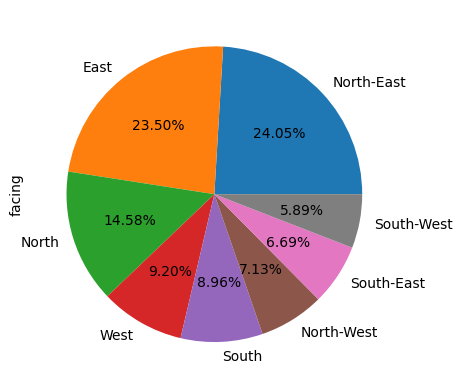

In [51]:
df['facing'].value_counts().plot(kind='pie', autopct='%0.2f%%',ylabel='facing')

In [52]:
df.drop(columns=['facing'],inplace=True)

In [53]:
df.sample(5)

,society,price,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2686,chd avenue,0.07,sector 71,659.0,2,2,2,8.0,Relatively New,flat,1084.0,0,0,0,0,1,1,0
696,ireo skyon,2.00,sector 60,1282.0,3,3,3,2.0,Relatively New,flat,2400.0,0,1,0,0,0,2,174
2190,sidhartha ncr one phase,0.04,sector 95,315.0,2,2,2,6.0,Relatively New,flat,1300.0,0,0,0,0,0,1,120
1902,emaar gurgaon greens,1.00,sector 102,818.0,3,3,3,5.0,Relatively New,flat,1315.0,0,1,0,0,0,1,119
1036,unitech heritage city,4.00,sector 14,1311.0,4,4,0,9.0,Undefined,flat,3250.0,0,0,0,0,0,1,0


In [54]:
df.isnull().sum()

society            1
price              0
sector             0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
property_type      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [55]:
df.drop(index=[2536],inplace=True)

In [56]:
df.isnull().sum()

society            1
price              0
sector             0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
property_type      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

#### agePossession

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1598
New Property           553
Moderately Old         522
Undefined              290
Old Property           279
Under Construction     262
Name: count, dtype: int64

In [58]:
df[df['agePossession'] == 'Undefined']

,society,price,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,dlf the arbour,8.50,sector 63,21519.0,4,4,3+,27.0,Undefined,house,3950.0,0,0,0,0,0,1,61
5,m3m golfestate,1.00,sector 79,1000.0,2,2,2,4.0,Undefined,flat,1556.0,1,1,1,0,0,0,83
10,signature global park,0.05,sohna road,669.0,2,2,3,3.0,Undefined,flat,913.0,0,0,0,0,0,1,58
15,spectrum centre,0.06,sector 82a,954.0,1,1,0,6.0,Undefined,flat,650.0,0,0,0,0,0,1,0
17,unitech escape,12.00,sector 50,37037.0,5,6,3+,3.0,Undefined,house,3240.0,0,0,0,0,0,1,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,imperia elvedor,0.05,sector 37c,822.0,1,1,0,5.0,Undefined,flat,669.0,0,0,0,0,0,1,0
3473,bhim garh kheri,1.50,sector 3,7576.0,7,2,0,1.0,Undefined,house,1980.0,0,0,0,0,0,1,0
3475,independent,1.70,sector 108,5667.0,4,4,3+,1.0,Undefined,house,3000.0,0,0,0,0,0,1,0
3480,dlf the arbour,7.00,sector 63,1900.0,4,4,3,15.0,Undefined,flat,3956.0,0,0,0,0,0,1,61


In [59]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [61]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [62]:
df['agePossession'].value_counts()

agePossession
Relatively New        1719
New Property           582
Moderately Old         556
Old Property           316
Under Construction     276
Undefined               55
Name: count, dtype: int64

In [63]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [64]:
df['agePossession'] = df.apply(mode_based_imputation2, axis=1)

In [65]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
New Property           583
Moderately Old         559
Old Property           319
Under Construction     276
Undefined               39
Name: count, dtype: int64

In [66]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [67]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [68]:
df['agePossession'].value_counts()

agePossession
Relatively New        1730
Moderately Old         596
New Property           583
Old Property           319
Under Construction     276
Name: count, dtype: int64

In [69]:
df.isnull().sum()

society            1
price              0
sector             0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
property_type      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [77]:
df.iloc[1588]

society            umang monsoon breeze
price                              0.06
sector                        sector 78
price_per_sqft                    369.0
bedRoom                               2
bathroom                              2
balcony                               0
floorNum                            2.0
agePossession        Under Construction
property_type                      flat
built_up_area                    1625.0
study room                            0
servant room                          0
store room                            0
pooja room                            0
others                                0
furnishing_type                       1
luxury_score                          0
Name: 1588, dtype: object

In [75]:
df['society'].fillna('umang monsoon breeze',inplace=True)

In [71]:
df[df['sector'] == 'sector 78']

,society,price,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
174,umang monsoon breeze,1.00,sector 78,528.0,3,3,3,9.0,Moderately Old,flat,1969.0,0,1,0,0,1,1,22
178,umang monsoon breeze,1.00,sector 78,500.0,4,4,3,2.0,Relatively New,flat,2300.0,0,1,0,1,1,1,57
456,umang monsoon breeze,0.09,sector 78,462.0,3,3,2,1.0,Moderately Old,flat,1900.0,0,1,0,1,0,1,65
544,umang monsoon breeze,1.00,sector 78,567.0,3,3,3,6.0,Moderately Old,flat,1853.0,0,0,0,0,0,1,0
782,raheja revanta,0.09,sector 78,610.0,2,2,3,14.0,Under Construction,flat,1467.0,0,0,0,0,1,1,39
806,umang monsoon breeze,0.06,sector 78,500.0,2,2,1,7.0,Moderately Old,flat,1115.0,0,0,1,0,0,1,111
971,umang monsoon breeze,0.09,sector 78,549.0,3,3,2,9.0,Relatively New,flat,1730.0,0,0,0,0,0,2,65
1022,raheja revanta,1.00,sector 78,1002.0,1,2,2,32.0,Under Construction,flat,823.0,0,0,0,0,0,1,39
1116,raheja revanta,4.00,sector 78,1688.0,3,3,2,31.0,Under Construction,flat,2813.0,0,1,0,0,0,1,100
1312,umang monsoon breeze,0.08,sector 78,484.0,3,2,2,7.0,Moderately Old,flat,1472.0,0,0,0,1,0,1,102


In [78]:
df.isnull().sum()

society            0
price              0
sector             0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
property_type      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [79]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv', index=False)

In [80]:
df.shape

(3504, 18)

In [81]:
df.head()

,society,price,sector,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_type,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,ambience creacions,6.00,sector 22,2053.0,4,5,3+,10.0,New Property,flat,3333.0,0,1,0,1,0,2,49
1,m3m woodshire,1.00,sector 107,750.0,2,2,3,0.0,Relatively New,flat,1281.0,1,0,0,0,0,1,29
2,satya the legend,9.25,sector 57,16577.0,5,5,3+,4.0,Relatively New,house,5580.0,1,1,1,1,0,2,160
3,vatika gurgaon,0.07,sector 83,627.0,2,2,2,3.0,Relatively New,flat,850.0,1,0,0,1,0,2,165
4,dlf the arbour,8.50,sector 63,21519.0,4,4,3+,27.0,New Property,house,3950.0,0,0,0,0,0,1,61
